In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import linerreg
%matplotlib inline

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

In [29]:
df = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')


In [30]:
# For numeric columns, SalePrice seems to be most associated with MachineID, YearMade, auctioneerID

# The goal of the contest is to predict the sale price of a particular piece of heavy equipment at 
# auction based on it's usage, equipment type, and configuration

### Clean up UsageBand

In [31]:
df['UsageBand'] = df['UsageBand'].apply(str)
df_test['UsageBand'] = df_test['UsageBand'].apply(str)

def format_usage_band(usage_band):
    usage_band = usage_band.strip()
    if usage_band == 'Medium' or usage_band == 'Low' or usage_band == 'High':
        return usage_band
    else:
        return 'Unkown'

df['UsageBand'] = df['UsageBand'].apply(format_usage_band)
df_test['UsageBand'] = df_test['UsageBand'].apply(format_usage_band)


### Function to create dummy columns for train/test

In [32]:
def get_value(column_value, dummy_column):
    value = dummy_column.split('is_')[1].strip().lower()
    if value == column_value.strip().lower():
        return 1
    else: 
        return 0

def create_dummy_column(dataframe, target_column, dummy_column_names):
    for dummy_col in dummy_column_names:
        df[dummy_col] = df[target_column].apply(get_value, args=(dummy_col,))

#For train set        
create_dummy_column(df, 'UsageBand', ['is_Low', 'is_Medium', 'is_High', 'is_Unkown'])

#For test set
create_dummy_column(df_test, 'UsageBand', ['is_Low', 'is_Medium', 'is_High', 'is_Unkown'])




### Clean up Year Made

In [33]:
median_year_made = df[df['YearMade'] != 1000]['YearMade'].median()

def set_1000_as_median(year_made, median):
    if  year_made == 1000:
        return median
    else:
        return year_made

df['YearMade'] = df['YearMade'].apply(set_1000_as_median, args=(median_year_made,))

__Add Machine Age to Train/Test data__

In [34]:
def add_machage(df):
    df['saleyear'] = pd.to_datetime(df['saledate']).apply(lambda d: d.year) 
    df['machage'] = df['saleyear'] - df['YearMade']

add_machage(df)
add_machage(df_test)

    

In [51]:
dist = df.groupby(['ProductGroupDesc'])
dist.size()


ProductGroupDesc
Backhoe Loaders         79415
Motor Graders           25489
Skid Steer Loaders      43488
Track Excavators       101167
Track Type Tractors     80520
Wheel Loader            71046
dtype: int64

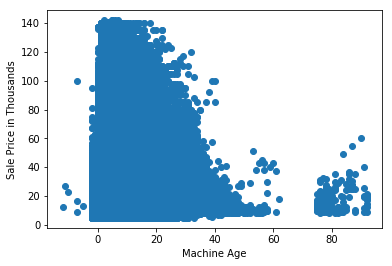

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df['machage'], df['SalePrice']/1000)
plt.xlabel('Machine Age')
plt.ylabel('Sale Price in Thousands')
